In [1]:
from plot import *
from gen import *
# from load_data import *  
from func_tools import *
from AGM import *
from GM import *
from BFGS import *
import warnings
warnings.filterwarnings('ignore')

C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:180: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-112)),
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:81: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:82: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  _epsneg_f80 = exp2(_ld(-64))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  _tiny_f80 = exp2(_ld(-16382))
C:\Users\15161\Anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(_ld(-63)),
C:\Users\15161\Anaconda3\lib\site-package

### 生成随机数

In [2]:
# 这里使用默认的参数，按照均匀分布的中心点
# TODO: task 上说可以尝试有趣的pattern，我们可以手动给定centroid再生成周围点，详见 gen.py 的文档
centroids, points, N = gen_data() 

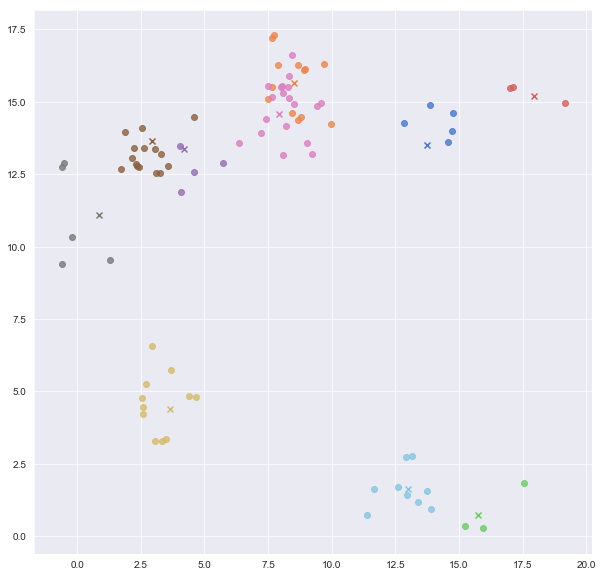

In [3]:
# 简单画个图
plt.figure(figsize=(10,10))
plot_generated_data(centroids, points, N)

## AGM Sample

In [4]:
lbd = 0.05
delta = 1e-3
n = len(points)
step = step_size(n,lbd,delta)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)

In [5]:
ans,AGM_loss = AGM(grad,points,step,0.001)

In [6]:
groups = get_group(ans, tol=2)

In [7]:
groups

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2])

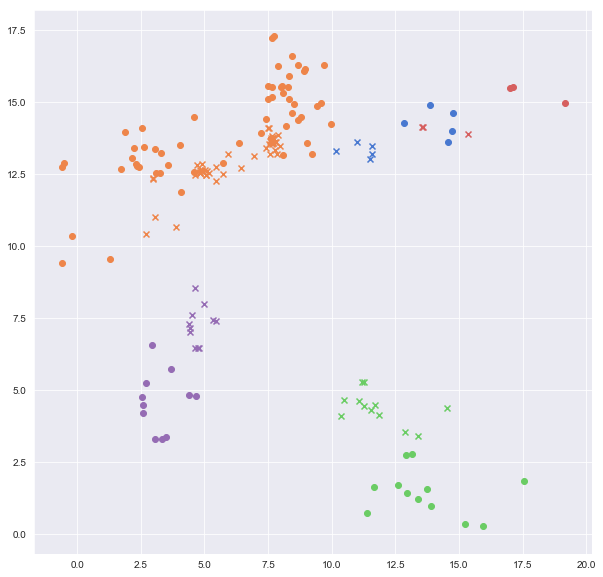

In [8]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups)

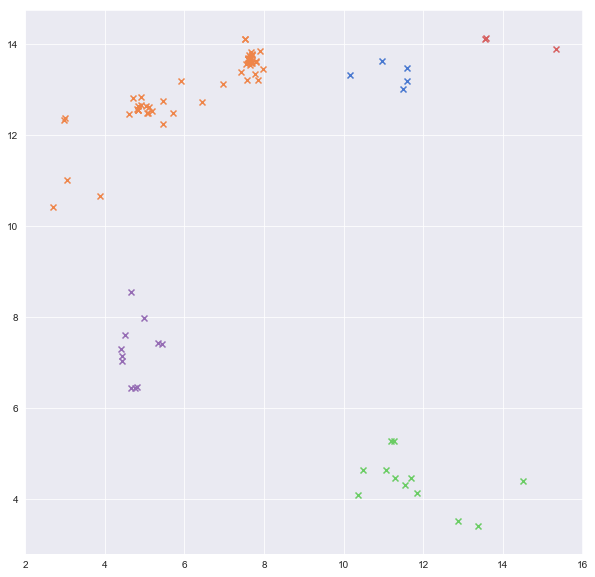

In [9]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='ans')

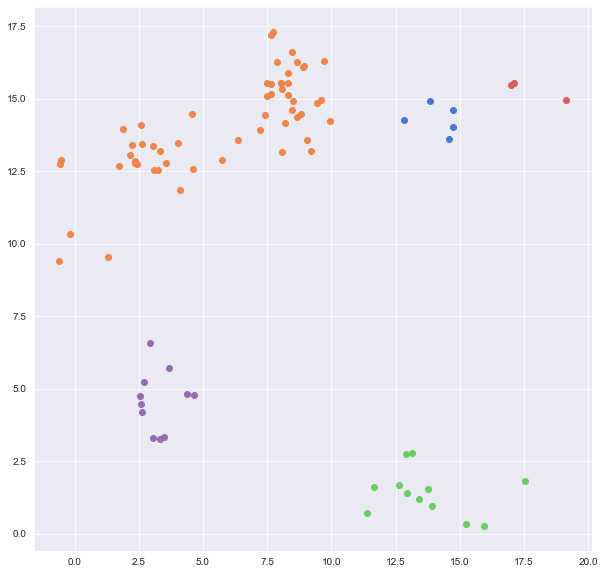

In [10]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans,groups,way='points')

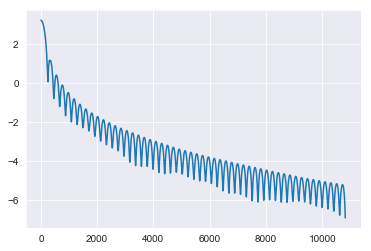

In [10]:
plt.plot(np.log(AGM_loss))

## GM Sample

In [4]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans2,GM_loss = GM(points,func,grad,0.001)

In [5]:
groups = get_group(ans2, tol=2)

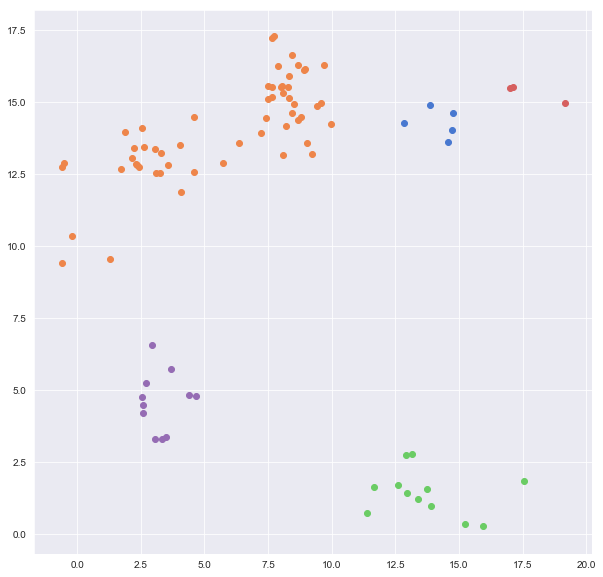

In [6]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans2,groups,way='points')

In [9]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

Text(0.5,0,'Iters')

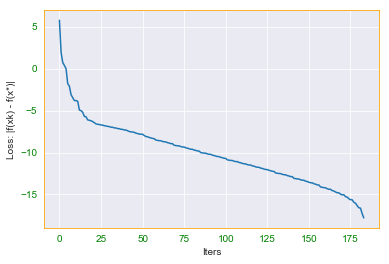

In [11]:
plt.plot(np.log(GM_loss - GM_loss[len(GM_loss)-1]))
plt.ylabel("Loss: |f(xk) - f(x*)|")
plt.xlabel("Iters")

## GM_BB Sample

In [4]:
lbd = 0.05
delta = 1e-3
func = lambda X,B: loss_func(X,points,lbd,delta,B)
grad = lambda X,B,D: grad_hub_matrix(X,delta,points,lbd,B,D)
ans_BB,GM_BB_loss = GM_BB(points,func,grad,0.001)

In [6]:
groups = get_group(ans_BB, tol=2)

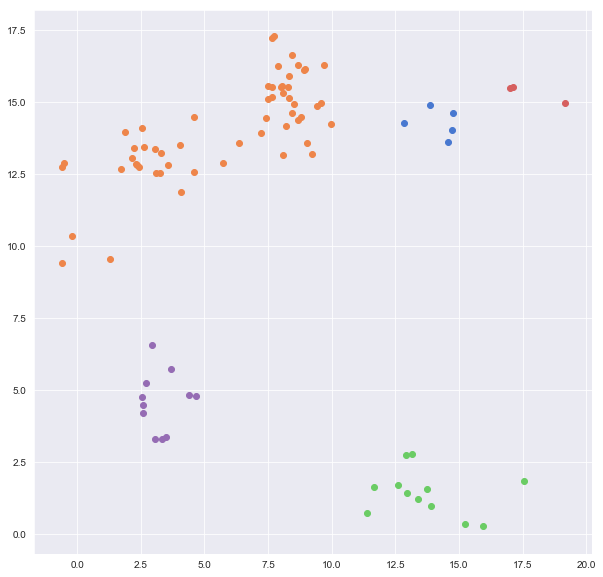

In [7]:
plt.figure(figsize=(10,10))
plot_res_data(points,ans_BB,groups,way='points')

In [8]:
plt.rc_context({'axes.edgecolor':'orange', 'xtick.color':'green', 'ytick.color':'green', 'figure.facecolor':'white'})

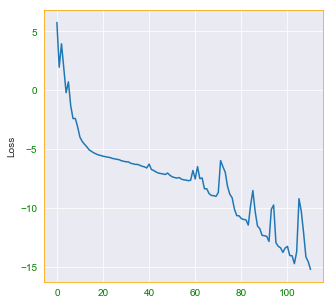

In [10]:
plt.figure(figsize=(5,5))
plt.ylabel("Loss")
plt.plot(np.log(GM_BB_loss - GM_BB_loss[len(GM_BB_loss)-1]))
plt.show()

## BFGS

## 使用原数据集转sparse后操作